In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time

In [3]:
!apt-get update
!apt-get install -y chromium-browser chromium-chromedriver
!pip install selenium bs4 pandas

'apt-get'ÏùÄ(Îäî) ÎÇ¥Î∂Ä ÎòêÎäî Ïô∏Î∂Ä Î™ÖÎ†π, Ïã§ÌñâÌï† Ïàò ÏûàÎäî ÌîÑÎ°úÍ∑∏Îû®, ÎòêÎäî
Î∞∞Ïπò ÌååÏùºÏù¥ ÏïÑÎãôÎãàÎã§.
'apt-get'ÏùÄ(Îäî) ÎÇ¥Î∂Ä ÎòêÎäî Ïô∏Î∂Ä Î™ÖÎ†π, Ïã§ÌñâÌï† Ïàò ÏûàÎäî ÌîÑÎ°úÍ∑∏Îû®, ÎòêÎäî
Î∞∞Ïπò ÌååÏùºÏù¥ ÏïÑÎãôÎãàÎã§.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
batter_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\batter_stat_2025.csv", encoding="cp949")
salary_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\player_salary.csv", encoding="cp949")


# ÌïÑÏöîÌïú Ïª¨Îüº Ï∂îÏ∂ú Î∞è Ïù¥Î¶Ñ Ï†ïÎ¶¨
batter_df = batter_df[["ÏÑ†ÏàòÎ™Ö", "ÌåÄÎ™Ö", "WAR", "ÌÉÄÏÑù"]]
salary_df = salary_df[["name", "team", "salary"]]
salary_df.rename(columns={"name": "ÏÑ†ÏàòÎ™Ö", "team": "ÌåÄÎ™Ö"}, inplace=True)

# Ïó∞Î¥â Ïà´ÏûêÌòï Î≥ÄÌôò
salary_df["salary"] = salary_df["salary"].replace(",", "", regex=True)
salary_df["salary"] = pd.to_numeric(salary_df["salary"], errors="coerce")

# Ïó∞Î¥â Îß§Ïπ≠
batter_merged = pd.merge(batter_df, salary_df, on=["ÏÑ†ÏàòÎ™Ö", "ÌåÄÎ™Ö"])

# ÌèâÍ∑† Ïó∞Î¥â Í≥ÑÏÇ∞
mean_salary = batter_merged["salary"].mean()

# WAR ÎåÄÎπÑ Ïó∞Î¥â Í≥ÑÏÇ∞
batter_merged["WAR_per_salary"] = batter_merged["WAR"] / batter_merged["salary"]

# Îèà Í∞í Î™ªÌïòÎäî ÏÑ†Ïàò TOP 10 (ÌèâÍ∑† Ïó∞Î¥â Ïù¥ÏÉÅÎßå Ìè¨Ìï®)
worst_batters = batter_merged[batter_merged["salary"] >= mean_salary]
worst_batters = worst_batters.sort_values("WAR_per_salary").head(10)

# Îèà Í∞í ÏûòÌïòÎäî ÏÑ†Ïàò TOP 10 (ÌÉÄÏÑù >= 300)
best_batters = batter_merged[batter_merged["ÌÉÄÏÑù"] >= 300]
best_batters = best_batters.sort_values("WAR_per_salary", ascending=False).head(10)


In [30]:
best_batters

ÏÑ†ÏàòÎ™Ö   ÌåÄÎ™Ö   WAR   ÌÉÄÏÑù   salary  WAR_per_salary
0   ÏïàÌòÑÎØº   KT  5.62  406   3300.0        0.001703
6   ÍπÄÏÑ±Ïú§   ÏÇºÏÑ±  4.36  454   7000.0        0.000623
46  Ïò§ÏÑ†Ïö∞  KIA  1.43  398   3400.0        0.000421
63  Ïò§Î™ÖÏßÑ   ÎëêÏÇ∞  1.04  345   3100.0        0.000335
21  Î¨∏ÌòÑÎπà   ÌïúÌôî  2.61  510   8800.0        0.000297
27  ÍπÄÌò∏Î†π  KIA  2.28  307   8000.0        0.000285
2   ÍπÄÏ£ºÏõê   NC  5.07  533  20000.0        0.000254
23  ÍπÄÌòïÏ§Ä   NC  2.57  347  11000.0        0.000234
10  Ïã†ÎØºÏû¨   LG  3.46  457  20000.0        0.000173
62  Ïù¥ÏßÑÏòÅ   ÌïúÌôî  1.04  324   6200.0        0.000168

In [38]:
worst_batters

ÏÑ†ÏàòÎ™Ö   ÌåÄÎ™Ö   WAR   ÌÉÄÏÑù    salary  WAR_per_salary
236  ÏïàÏπòÌôç   ÌïúÌôî -1.69  172   50000.0       -0.000034
229  Î∞∞Ï†ïÎåÄ   KT -0.61  272   34000.0       -0.000018
222  ÏµúÏõêÏ§Ä  KIA -0.51  245   40000.0       -0.000013
226  Î∞ïÏÑ∏ÌòÅ   NC -0.54   72   60000.0       -0.000009
214  Ïã¨Ïö∞Ï§Ä   ÌïúÌôî -0.41  227   50000.0       -0.000008
106  Í∞ïÏäπÌò∏   ÎëêÏÇ∞  0.11  352   37000.0        0.000003
105  ÏñëÏÑùÌôò   ÎëêÏÇ∞  0.11  263   30000.0        0.000004
91   ÎÖ∏ÏßÑÌòÅ   Î°ØÎç∞  0.27   56   70000.0        0.000004
89   ÏÜêÏïÑÏÑ≠   NC  0.29  268   50000.0        0.000006
51   Î°úÌïòÏä§   KT  1.32  388  210000.0        0.000006

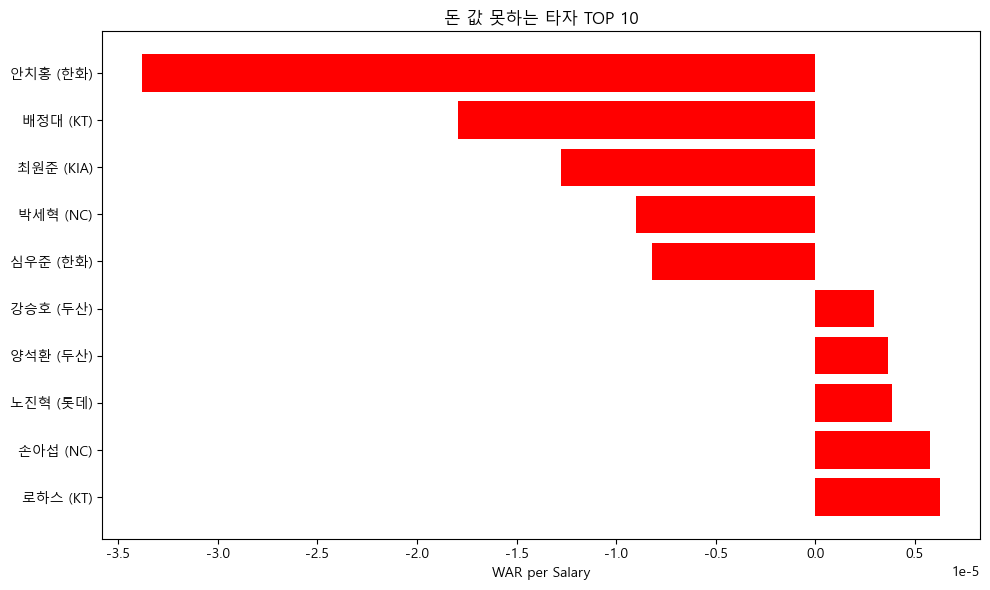

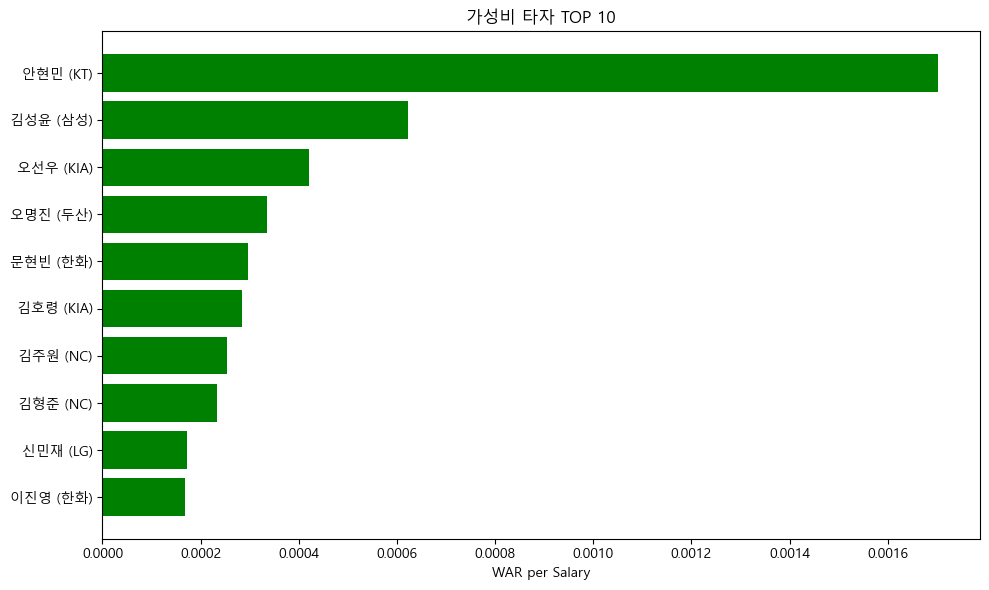

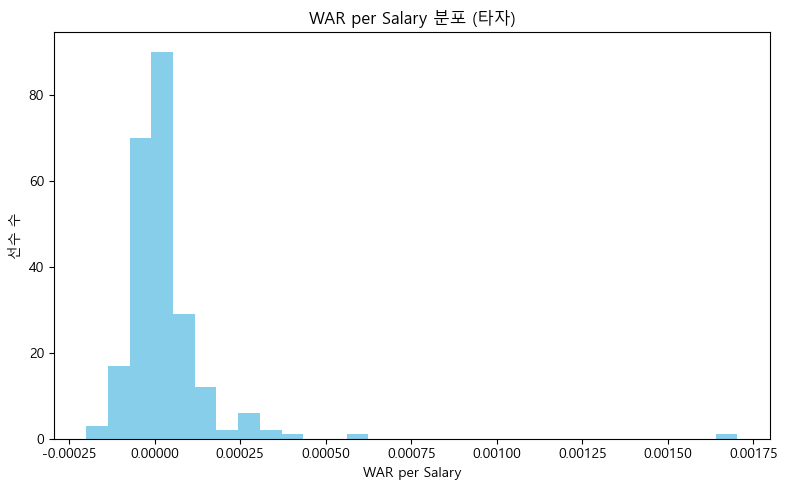

In [39]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
labels = worst_batters["ÏÑ†ÏàòÎ™Ö"] + " (" + worst_batters["ÌåÄÎ™Ö"] + ")"
plt.barh(labels, worst_batters["WAR_per_salary"], color="red")
plt.title("Îèà Í∞í Î™ªÌïòÎäî ÌÉÄÏûê TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
labels = best_batters["ÏÑ†ÏàòÎ™Ö"] + " (" + best_batters["ÌåÄÎ™Ö"] + ")"
plt.barh(labels, best_batters["WAR_per_salary"], color="green")
plt.title("Í∞ÄÏÑ±ÎπÑ ÌÉÄÏûê TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Ï†ÑÏ≤¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(batter_merged["WAR_per_salary"], bins=30, color="skyblue")
plt.title("WAR per Salary Î∂ÑÌè¨ (ÌÉÄÏûê)")
plt.xlabel("WAR per Salary")
plt.ylabel("ÏÑ†Ïàò Ïàò")
plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# ÏãúÏä§ÌÖúÏóê Îî∞Îùº Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"  # ÏúàÎèÑÏö∞ Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
elif platform.system() == "Darwin":  # macOS
    plt.rcParams["font.family"] = "AppleGothic"
else:  # Î¶¨ÎàÖÏä§
    plt.rcParams["font.family"] = "NanumGothic"

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams["axes.unicode_minus"] = False


In [10]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
pitcher_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\pitcher_stat_2025.csv", encoding="cp949")

# ÌïÑÏöîÌïú Ïª¨Îüº Ï∂îÏ∂ú Î∞è Ïù¥Î¶Ñ Ï†ïÎ¶¨
pitcher_df = pitcher_df[["ÏÑ†ÏàòÎ™Ö", "ÌåÄÎ™Ö", "FIP-WAR", "Ïù¥Îãù"]]

# Ïó∞Î¥â Îß§Ïπ≠
pitcher_merged = pd.merge(pitcher_df, salary_df, on=["ÏÑ†ÏàòÎ™Ö", "ÌåÄÎ™Ö"])

# ÌèâÍ∑† Ïó∞Î¥â Í≥ÑÏÇ∞
mean_salary_pitcher = pitcher_merged["salary"].mean()

# WAR ÎåÄÎπÑ Ïó∞Î¥â Í≥ÑÏÇ∞
pitcher_merged["WAR_per_salary"] = pitcher_merged["FIP-WAR"] / pitcher_merged["salary"]

# Îèà Í∞í Î™ªÌïòÎäî ÏÑ†Ïàò TOP 10 (ÌèâÍ∑† Ïó∞Î¥â Ïù¥ÏÉÅÎßå Ìè¨Ìï®)
worst_pitchers = pitcher_merged[pitcher_merged["salary"] >= mean_salary_pitcher]
worst_pitchers = worst_pitchers.sort_values("WAR_per_salary").head(10)

# Îèà Í∞í ÏûòÌïòÎäî ÏÑ†Ïàò TOP 10 (Ïù¥Îãù >= 100)
best_pitchers = pitcher_merged[pitcher_merged["Ïù¥Îãù"] >= 100]
best_pitchers = best_pitchers.sort_values("WAR_per_salary", ascending=False).head(10)


In [52]:
worst_pitchers

ÏÑ†ÏàòÎ™Ö   ÌåÄÎ™Ö  FIP-WAR    Ïù¥Îãù    salary  WAR_per_salary
216   Î∞ïÏ¢ÖÌõà  SSG    -0.70  19.0  110000.0   -6.363636e-06
188   ÌôçÍ±¥Ìù¨   ÎëêÏÇ∞    -0.17  13.1   30000.0   -5.666667e-06
178   Ï£ºÌòÑÏÉÅ   ÌïúÌôî    -0.12  36.1   25000.0   -4.800000e-06
176   ÏÑúÏßÑÏö©  SSG    -0.11   1.1   38000.0   -2.894737e-06
173   Î¨∏ÏäπÏõê  SSG    -0.10  95.1   80000.0   -1.250000e-06
157   Ïò§ÏäπÌôò   ÏÇºÏÑ±    -0.04   8.2   80000.0   -5.000000e-07
149  Ïø†ÏóêÎ∞îÏä§   KT    -0.02  98.1  140000.0   -1.428571e-07
115   ÌïúÌòÑÌù¨   Î°ØÎç∞     0.06   8.2  100000.0    6.000000e-07
130   Íµ¨ÏäπÎØº   Î°ØÎç∞     0.02   6.0   30000.0    6.666667e-07
128   ÏûÑÍ∏∞ÏòÅ  KIA     0.03   9.0   30000.0    1.000000e-06

In [53]:
best_pitchers

ÏÑ†ÏàòÎ™Ö   ÌåÄÎ™Ö  FIP-WAR     Ïù¥Îãù   salary  WAR_per_salary
27  ÏÜ°ÏäπÍ∏∞   LG     2.20  123.1   3600.0        0.000611
9   Î¨∏ÎèôÏ£º   ÌïúÌôî     4.32  107.2  10000.0        0.000432
21  ÎÇòÍ∑†Ïïà   Î°ØÎç∞     2.64  130.0  12000.0        0.000220
14  ÏÜêÏ£ºÏòÅ   LG     3.63  133.0  17200.0        0.000211
31  ÏµúÏäπÏö©   ÎëêÏÇ∞     1.77  106.2   8500.0        0.000208
8   ÏÜåÌòïÏ§Ä   KT     4.51  130.0  22000.0        0.000205
23  Ïò§ÏõêÏÑù   KT     2.52  120.2  14000.0        0.000180
36  ÍπÄÎèÑÌòÑ  KIA     1.58  120.0   9000.0        0.000176
16  ÏûÑÏ∞¨Í∑ú   LG     3.37  144.1  20000.0        0.000169
34  ÏµúÏõêÌÉú   ÏÇºÏÑ±     1.69  114.2  20000.0        0.000084

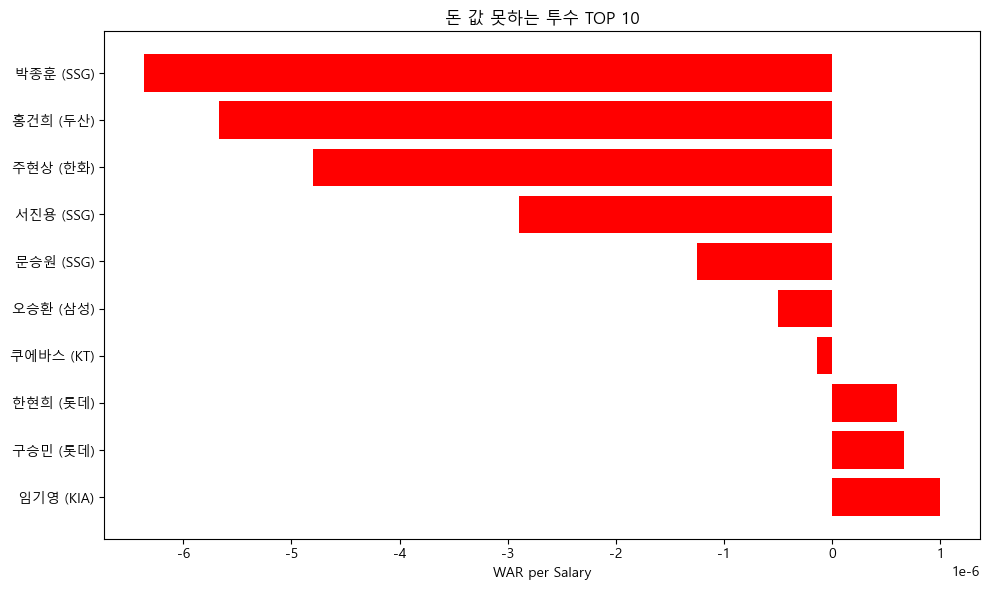

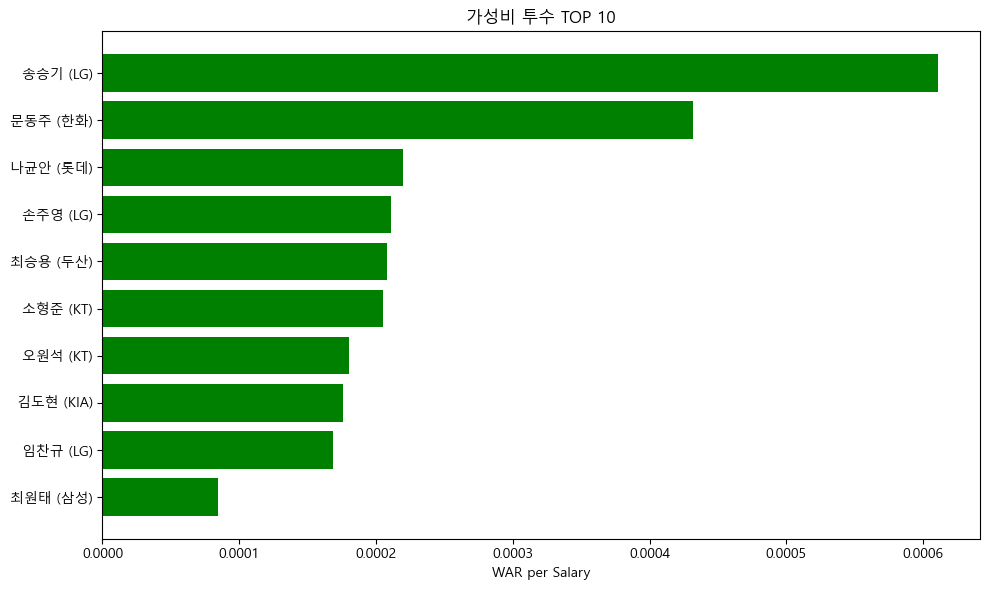

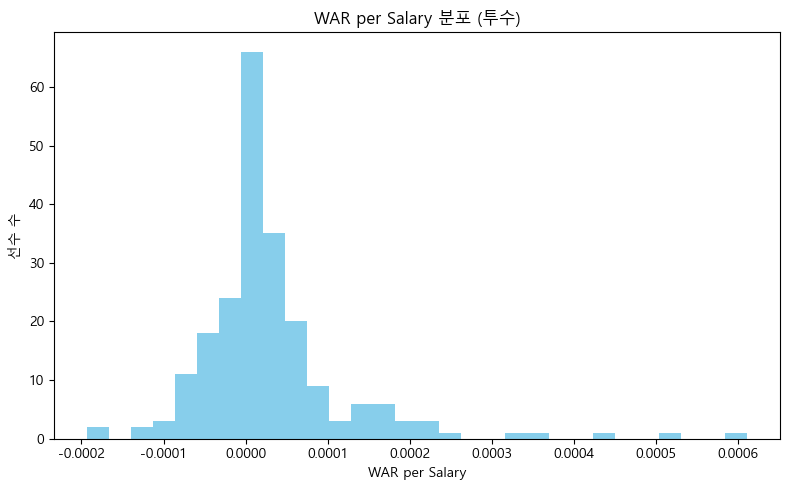

In [40]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
labels = worst_pitchers["ÏÑ†ÏàòÎ™Ö"] + " (" + worst_pitchers["ÌåÄÎ™Ö"] + ")"
plt.barh(labels, worst_pitchers["WAR_per_salary"], color="red")
plt.title("Îèà Í∞í Î™ªÌïòÎäî Ìà¨Ïàò TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
labels = best_pitchers["ÏÑ†ÏàòÎ™Ö"] + " (" + best_pitchers["ÌåÄÎ™Ö"] + ")"
plt.barh(labels, best_pitchers["WAR_per_salary"], color="green")
plt.title("Í∞ÄÏÑ±ÎπÑ Ìà¨Ïàò TOP 10")
plt.xlabel("WAR per Salary")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Ï†ÑÏ≤¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(pitcher_merged["WAR_per_salary"], bins=30, color="skyblue")
plt.title("WAR per Salary Î∂ÑÌè¨ (Ìà¨Ïàò)")
plt.xlabel("WAR per Salary")
plt.ylabel("ÏÑ†Ïàò Ïàò")
plt.tight_layout()
plt.show()


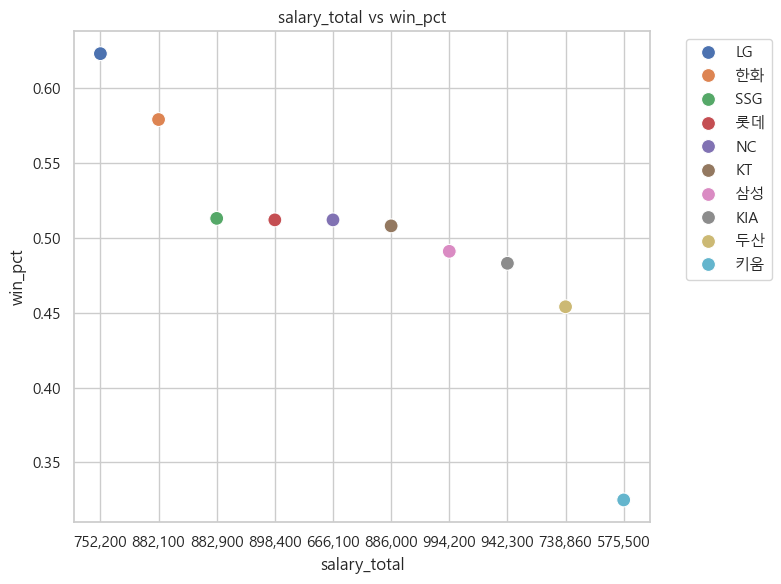

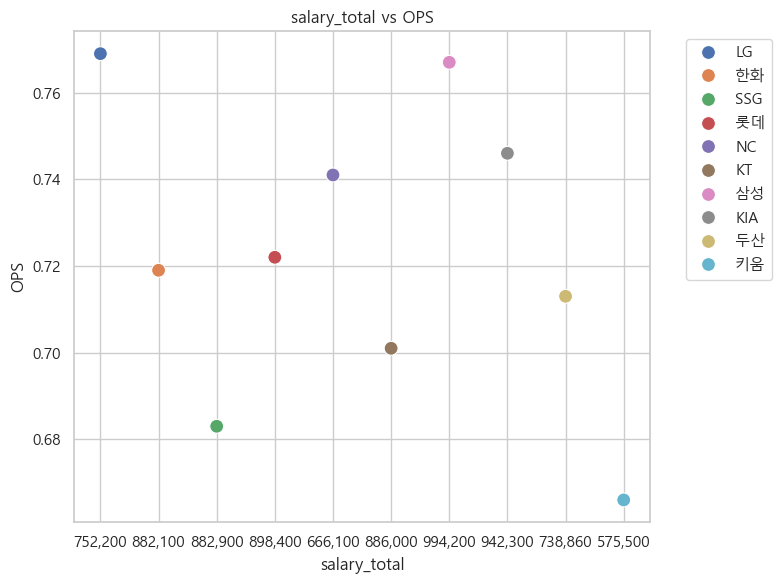

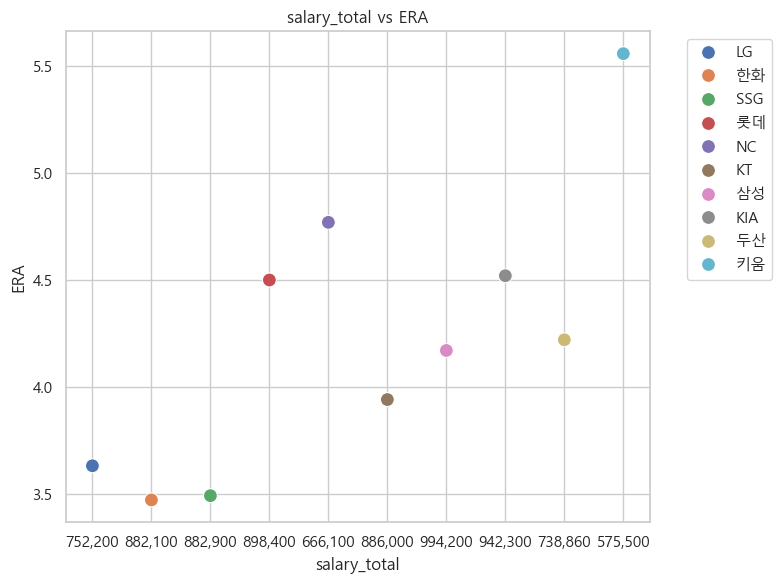

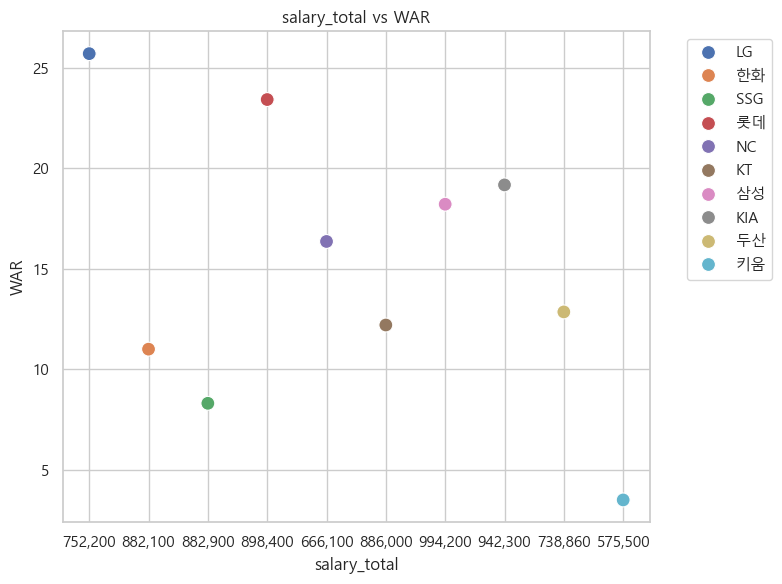

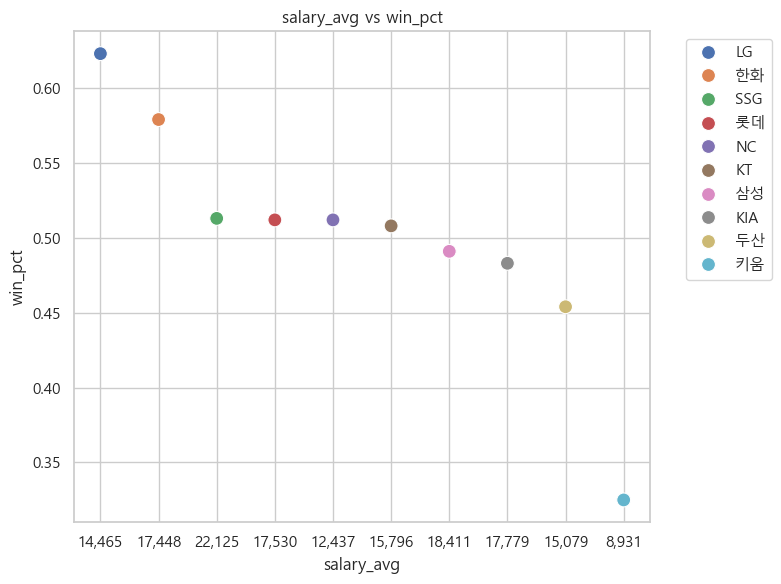

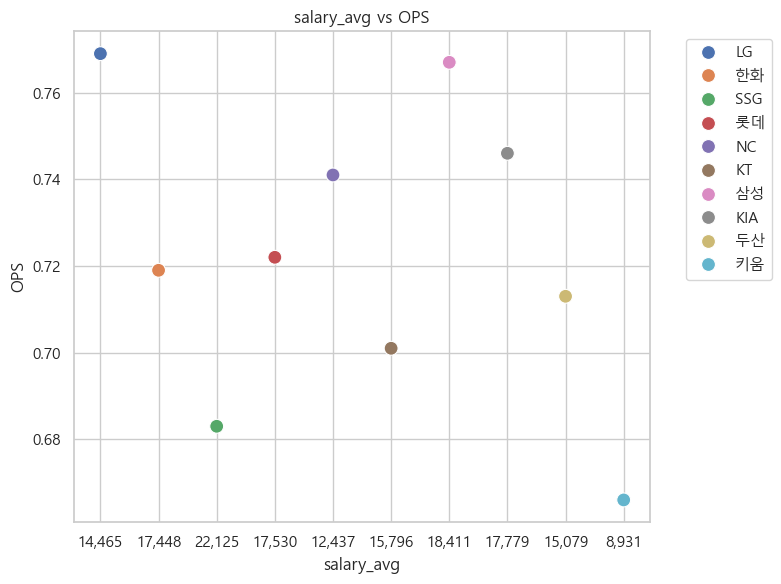

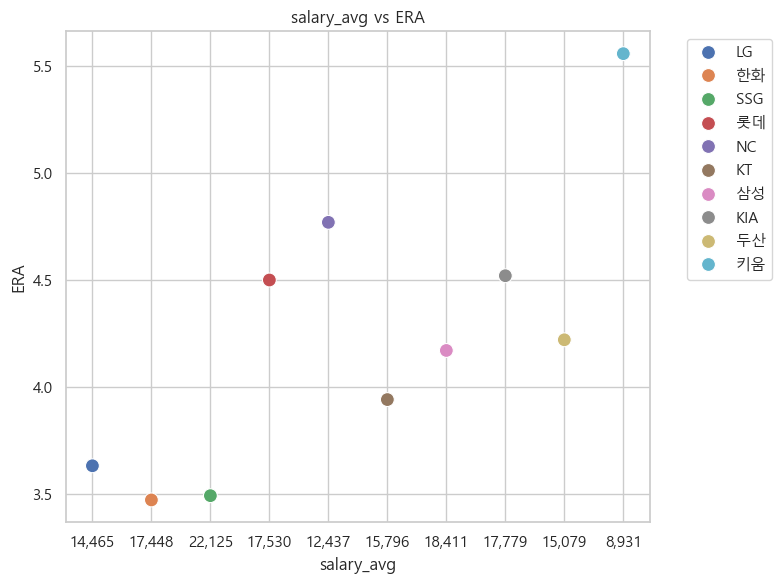

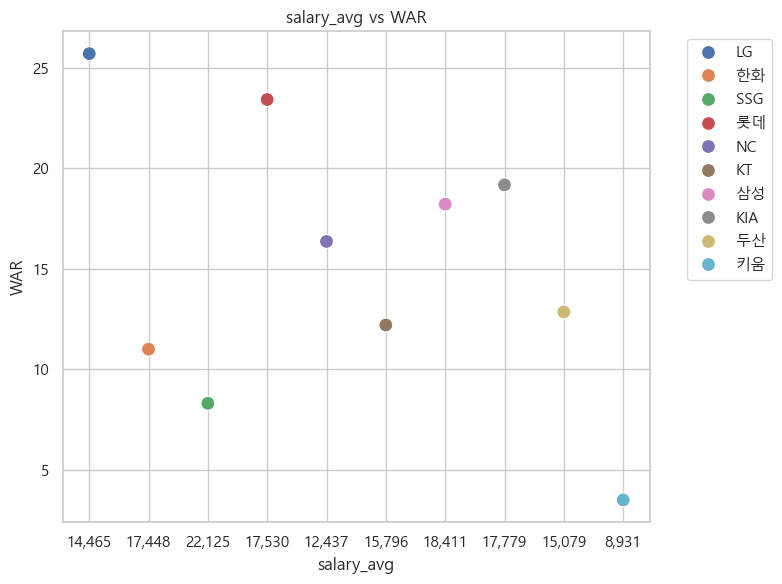

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


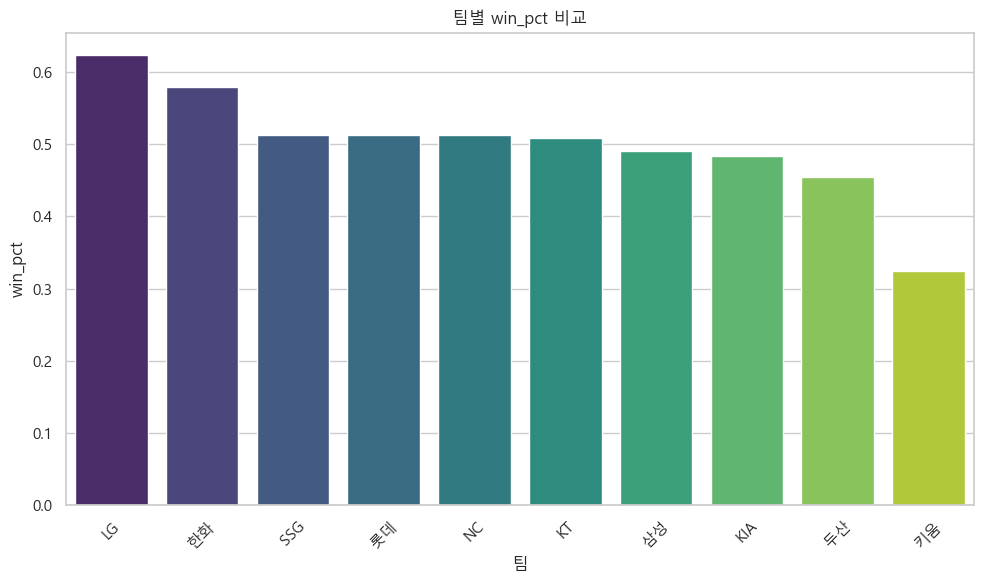

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


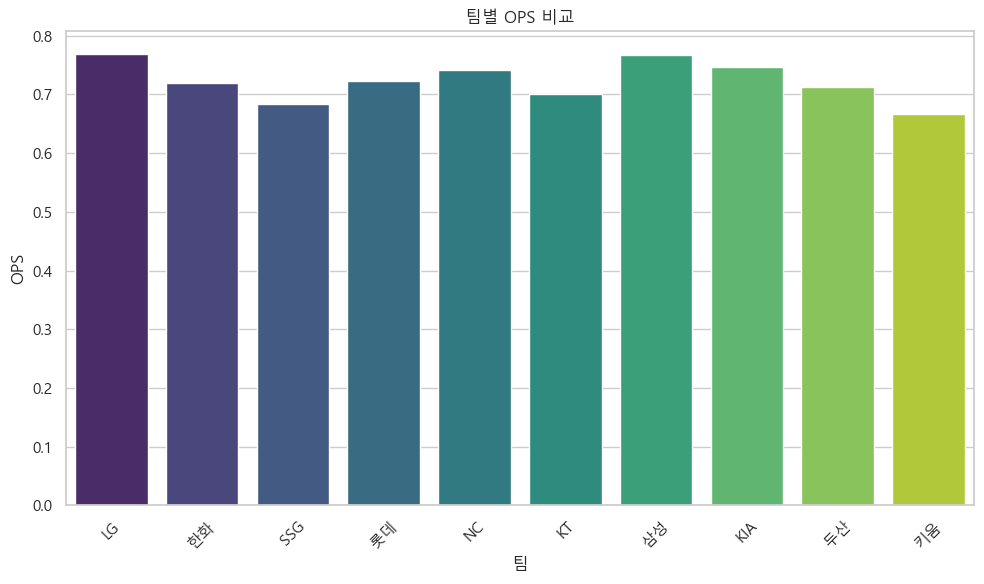

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


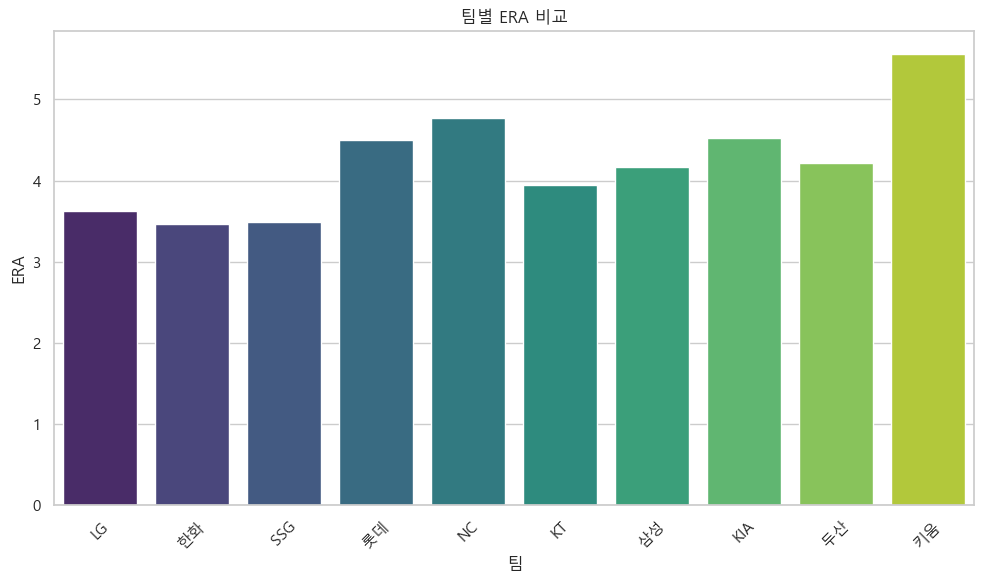

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_11776\3781887944.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="team", y=metric, palette="viridis")


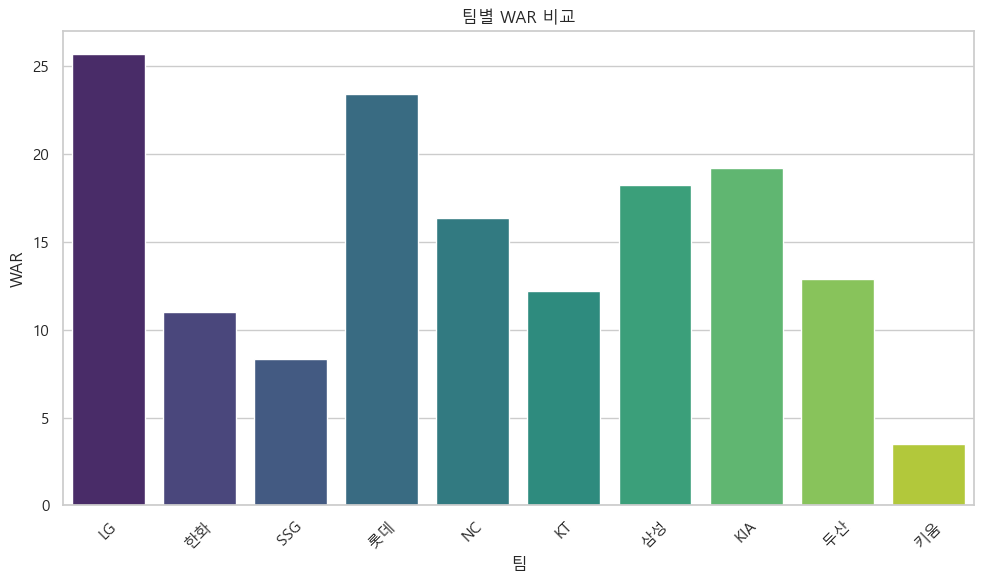

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')  # Linux ÌôòÍ≤Ω

plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# 1. CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
stats_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2025.csv",encoding="cp949")
salary_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2025.csv",encoding="cp949")

# üîó Î≥ëÌï©
df = pd.merge(stats_df, salary_df, on="team")

# üéØ Î∂ÑÏÑù ÏßÄÌëú
performance_metrics = ["win_pct", "OPS", "ERA", "WAR"]
salary_metrics = ["salary_total", "salary_avg"]

# üìä ÏÇ∞Ï†êÎèÑ: Ïó∞Î¥â vs ÏÑ±Ï†Å ÏßÄÌëú
for salary in salary_metrics:
    for metric in performance_metrics:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=salary, y=metric, hue="team", s=100)
        plt.title(f"{salary} vs {metric}")
        plt.xlabel(salary)
        plt.ylabel(metric)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# üìà ÎßâÎåÄÍ∑∏ÎûòÌîÑ: ÌåÄÎ≥Ñ ÏÑ±Ï†Å ÏßÄÌëú
for metric in performance_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="team", y=metric, palette="viridis")
    plt.title(f"ÌåÄÎ≥Ñ {metric} ÎπÑÍµê")
    plt.xlabel("ÌåÄ")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


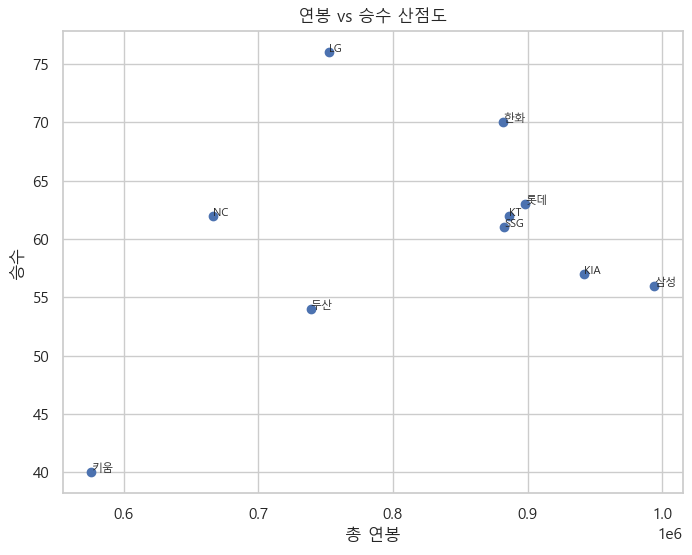

<Figure size 640x480 with 0 Axes>

In [36]:
# (1) Ïó∞Î¥â vs ÏäπÏàò
plt.figure(figsize=(8,6))
plt.scatter(df["salary_total"], df["wins"])
for i, row in df.iterrows():
    plt.text(row["salary_total"], row["wins"], row["team"], fontsize=8)
plt.xlabel("Ï¥ù Ïó∞Î¥â")
plt.ylabel("ÏäπÏàò")
plt.title("Ïó∞Î¥â vs ÏäπÏàò ÏÇ∞Ï†êÎèÑ")
plt.show()
plt.tight_layout()

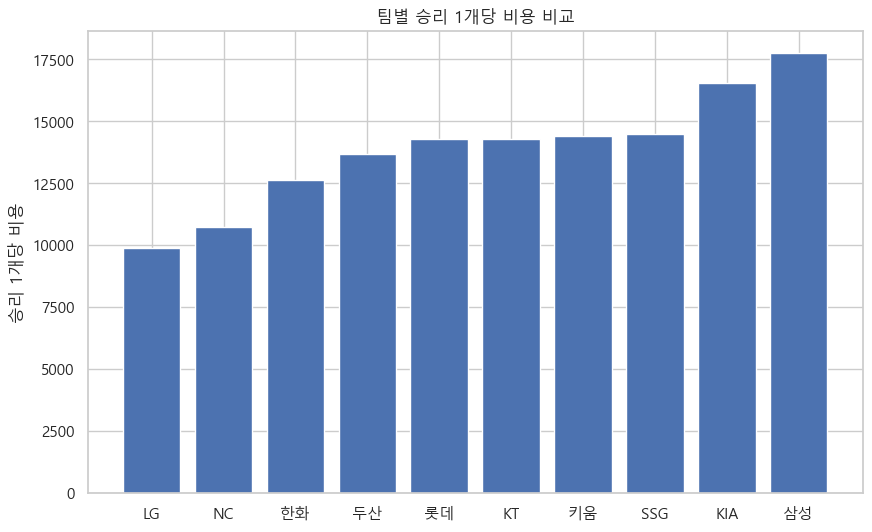

In [37]:
# ÏäπÎ¶¨ ÎπÑÏö© ÎßâÎåÄÍ∑∏ÎûòÌîÑ
df_sorted = df.sort_values("Cost_per_Win")
plt.figure(figsize=(10,6))
plt.bar(df_sorted["team"], df_sorted["Cost_per_Win"])
plt.ylabel("ÏäπÎ¶¨ 1Í∞úÎãπ ÎπÑÏö©")
plt.title("ÌåÄÎ≥Ñ ÏäπÎ¶¨ 1Í∞úÎãπ ÎπÑÏö© ÎπÑÍµê")
plt.show()

ÏäπÎ¶¨Îãπ ÎπÑÏö© Í∏∞Ï§Ä Í∞ÄÏû• ÎèàÏùÑ Î™ª Ïì¥ ÌåÄ: ÏÇºÏÑ± (13,503Ïõê)
WARÎãπ ÎπÑÏö© Í∏∞Ï§Ä Í∞ÄÏû• ÎèàÏùÑ Î™ª Ïì¥ ÌåÄ: ÌÇ§ÏõÄ (109,099Ïõê)


C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\1658624512.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary.sort_values("Cost_per_Win", ascending=False), x="team", y="Cost_per_Win", palette="rocket")


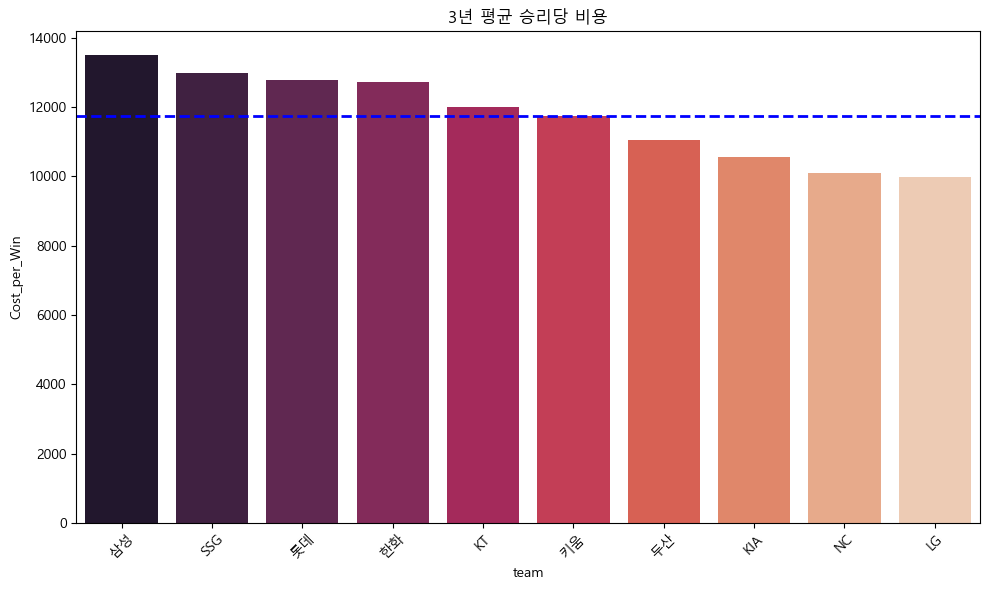

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\1658624512.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary.sort_values("Cost_per_WAR", ascending=False), x="team", y="Cost_per_WAR", palette="mako")


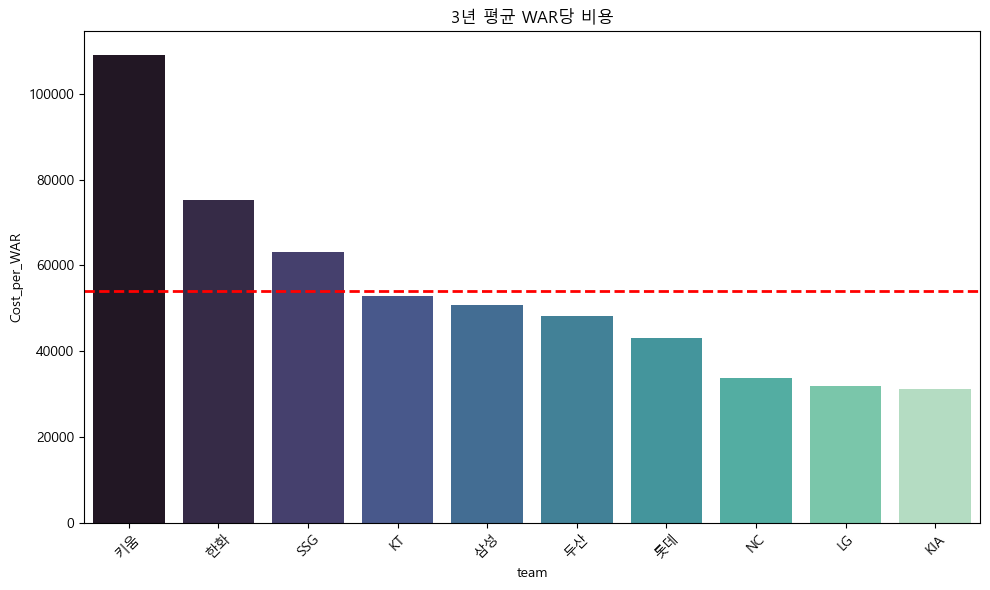

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üì• Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
stats_2023 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2023.csv", encoding="cp949")
salary_2023 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2023.csv", encoding="cp949")

stats_2024 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2024.csv", encoding="cp949")
salary_2024 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2024.csv", encoding="cp949")

stats_2025 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2025.csv", encoding="cp949")
salary_2025 = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2025.csv", encoding="cp949")

# üßπ Ïà´ÏûêÌòï Î≥ÄÌôò
def clean_salary(df):
    df["salary_total"] = pd.to_numeric(df["salary_total"].str.replace(",", ""), errors="coerce")
    return df

salary_2023 = clean_salary(salary_2023)
salary_2024 = clean_salary(salary_2024)
salary_2025 = clean_salary(salary_2025)

# üîó Î≥ëÌï© Î∞è Ïó∞ÎèÑ Ï∂îÍ∞Ä
merged_2023 = pd.merge(stats_2023, salary_2023, on="team")
merged_2023["year"] = 2023

merged_2024 = pd.merge(stats_2024, salary_2024, on="team")
merged_2024["year"] = 2024

merged_2025 = pd.merge(stats_2025, salary_2025, on="team")
merged_2025["year"] = 2025

# üîó Ï†ÑÏ≤¥ ÌÜµÌï©
all_df = pd.concat([merged_2023, merged_2024, merged_2025])

# üìä ÌåÄÎ≥Ñ 3ÎÖÑ ÌèâÍ∑† Í≥ÑÏÇ∞
summary = all_df.groupby("team").agg({
    "salary_total": "sum",
    "wins": "sum",
    "WAR": "sum"
}).reset_index()

summary["avg_salary"] = summary["salary_total"] / 3
summary["avg_wins"] = summary["wins"] / 3
summary["avg_WAR"] = summary["WAR"] / 3

# üí∞ ÎπÑÏö© Ìö®Ïú®ÏÑ± Í≥ÑÏÇ∞
summary["Cost_per_Win"] = summary["avg_salary"] / summary["avg_wins"]
summary["Cost_per_WAR"] = summary["avg_salary"] / summary["avg_WAR"]

# ü•µ ÎèàÏùÑ Í∞ÄÏû• Î™ª Ïì¥ ÌåÄ
worst_win_team = summary.sort_values("Cost_per_Win", ascending=False).iloc[0]
worst_war_team = summary.sort_values("Cost_per_WAR", ascending=False).iloc[0]

print(f"ÏäπÎ¶¨Îãπ ÎπÑÏö© Í∏∞Ï§Ä Í∞ÄÏû• ÎèàÏùÑ Î™ª Ïì¥ ÌåÄ: {worst_win_team['team']} ({int(worst_win_team['Cost_per_Win']):,}Ïõê)")
print(f"WARÎãπ ÎπÑÏö© Í∏∞Ï§Ä Í∞ÄÏû• ÎèàÏùÑ Î™ª Ïì¥ ÌåÄ: {worst_war_team['team']} ({int(worst_war_team['Cost_per_WAR']):,}Ïõê)")

# üìà ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=summary.sort_values("Cost_per_Win", ascending=False), x="team", y="Cost_per_Win", palette="rocket")
avg_win_cost = summary["Cost_per_Win"].mean()
plt.axhline(y=avg_win_cost, color='blue', linestyle='--', linewidth=2, label=f'ÌèâÍ∑†: {avg_win_cost:,.0f}Ïõê')
plt.title("3ÎÖÑ ÌèâÍ∑† ÏäπÎ¶¨Îãπ ÎπÑÏö©")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=summary.sort_values("Cost_per_WAR", ascending=False), x="team", y="Cost_per_WAR", palette="mako")
avg_war_cost = summary["Cost_per_WAR"].mean()
plt.axhline(y=avg_war_cost, color='red', linestyle='--', linewidth=2, label=f'ÌèâÍ∑†: {avg_war_cost:,.0f}Ïõê')
plt.title("3ÎÖÑ ÌèâÍ∑† WARÎãπ ÎπÑÏö©")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\2341273904.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="postseason", y="salary_total", palette="Set2")


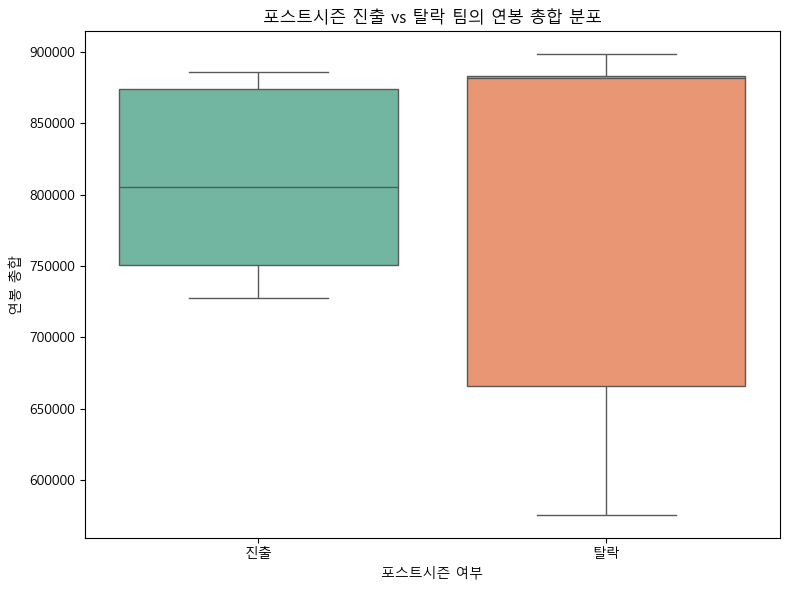

C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_6616\2341273904.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="postseason", y="salary_avg", palette="Set3")


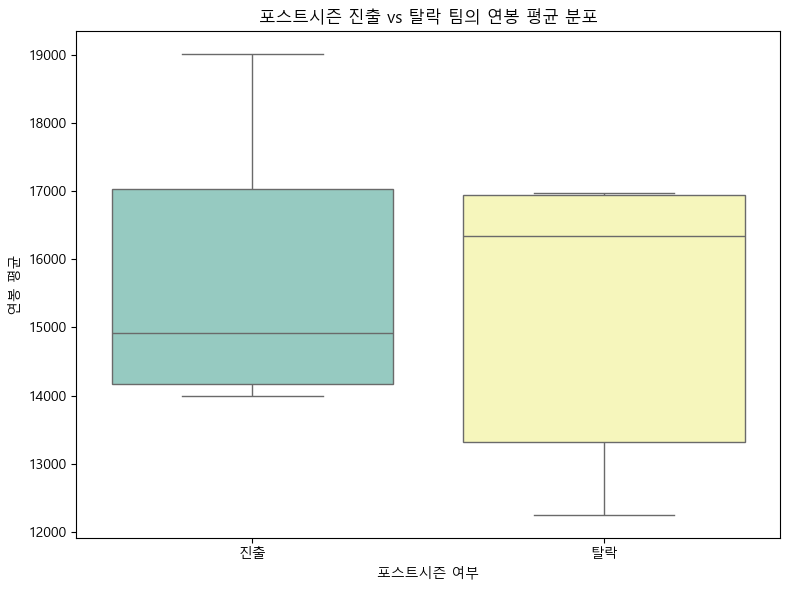

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#  Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
stats_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_stats_2024.csv",encoding="cp949")
salary_df = pd.read_csv(r"C:\Users\NT551_11TH\Downloads\team_salary_2024.csv",encoding="cp949")

# üîó Î≥ëÌï©
df = pd.merge(stats_df, salary_df, on="team")

# üí∞ Ïà´ÏûêÌòï Î≥ÄÌôò
df["salary_total"] = pd.to_numeric(df["salary_total"].str.replace(',', ''), errors="coerce")
df["salary_avg"] = pd.to_numeric(df["salary_avg"].str.replace(',', ''), errors="coerce")
df["win_pct"] = pd.to_numeric(df["win_pct"], errors="coerce")

# üèÜ ÏäπÎ•† Í∏∞Ï§Ä ÏàúÏúÑ Í≥ÑÏÇ∞
df = df.sort_values(by="win_pct", ascending=False).reset_index(drop=True)
df["postseason"] = ["ÏßÑÏ∂ú" if i < 5 else "ÌÉàÎùΩ" for i in df.index]

# üìä Î∞ïÏä§ÌîåÎ°Ø: Ïó∞Î¥â Ï¥ùÌï©
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="postseason", y="salary_total", palette="Set2")
plt.title("Ìè¨Ïä§Ìä∏ÏãúÏ¶å ÏßÑÏ∂ú vs ÌÉàÎùΩ ÌåÄÏùò Ïó∞Î¥â Ï¥ùÌï© Î∂ÑÌè¨")
plt.xlabel("Ìè¨Ïä§Ìä∏ÏãúÏ¶å Ïó¨Î∂Ä")
plt.ylabel("Ïó∞Î¥â Ï¥ùÌï©")
plt.tight_layout()
plt.show()

# üìä Î∞ïÏä§ÌîåÎ°Ø: Ïó∞Î¥â ÌèâÍ∑†
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="postseason", y="salary_avg", palette="Set3")
plt.title("Ìè¨Ïä§Ìä∏ÏãúÏ¶å ÏßÑÏ∂ú vs ÌÉàÎùΩ ÌåÄÏùò Ïó∞Î¥â ÌèâÍ∑† Î∂ÑÌè¨")
plt.xlabel("Ìè¨Ïä§Ìä∏ÏãúÏ¶å Ïó¨Î∂Ä")
plt.ylabel("Ïó∞Î¥â ÌèâÍ∑†")
plt.tight_layout()
plt.show()
